## **Potato Disease** **Classification**

Cnnecting kaggle to google colaboratory

In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets list

ref                                                         title                                               size  lastUpdated          downloadCount  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
nkitgupta/jigsaw-regression-based-data                      Jigsaw Regression Based Data                         3GB  2022-01-10 06:29:59            656  
yamqwe/omicron-covid19-variant-daily-cases                  Omicron daily cases by country (COVID-19 variant)  432KB  2022-01-30 09:11:54          11867  
prasertk/netflix-subscription-price-in-different-countries  Netflix subscription fee in different countries      3KB  2022-01-15 07:06:09           1660  
yasserh/wine-quality-dataset                                Wine Quality Dataset                                21KB  2022-01-15 19:15:11           1475  
iamsouravbanerjee/analytics-industry-salaries-2022-india    Data Profe

Importing potato leaf disease Dataset

In [9]:
! kaggle datasets download -d muhammadardiputra/potato-leaf-disease-dataset

 36% 9.00M/25.2M [00:00<00:00, 24.8MB/s]
100% 25.2M/25.2M [00:00<00:00, 56.9MB/s]


In [10]:
!unzip /content/potato-leaf-disease-dataset.zip

Archive:  /content/potato-leaf-disease-dataset.zip
  inflating: Potato/Test/Potato___Early_blight/034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG  
  inflating: Potato/Test/Potato___Early_blight/042135e2-e126-4900-9212-d42d900b8125___RS_Early.B 8791.JPG  
  inflating: Potato/Test/Potato___Early_blight/0604174e-3018-4faa-9975-0be32d2c0789___RS_Early.B 7123.JPG  
  inflating: Potato/Test/Potato___Early_blight/07953ca1-8935-449f-b338-4357ed683b2d___RS_Early.B 6815.JPG  
  inflating: Potato/Test/Potato___Early_blight/08029ccc-387e-4be6-9389-04f7b82fdb2a___RS_Early.B 9130.JPG  
  inflating: Potato/Test/Potato___Early_blight/08194ca3-f0b2-4aaa-8df8-5ec5ddc6696a___RS_Early.B 8151.JPG  
  inflating: Potato/Test/Potato___Early_blight/08392b44-ecc6-4f38-8566-361b552cfe21___RS_Early.B 7393.JPG  
  inflating: Potato/Test/Potato___Early_blight/107827b3-faa5-457c-97fd-3e34d2657f6b___RS_Early.B 7162.JPG  
  inflating: Potato/Test/Potato___Early_blight/109730cd-03f3-4139-a464-5f9151483e8c__

**Import all the** **Dependencies**

In [11]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

**Import all the Dependencies**

In [12]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

**Import data into tensorflow dataset object**

In [13]:
train = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Potato/Train",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 900 files belonging to 3 classes.


In [14]:
test = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Potato/Test",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 300 files belonging to 3 classes.


In [15]:
valid = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Potato/Valid",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 300 files belonging to 3 classes.


In [16]:
class_names = train.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [17]:
for image_batch, labels_batch in train.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 2 2 2 0 1 2 1 0 1 0 0 1 1 2 2 0 0 1 1 2 2 1 0 2 0 0 0 1 2 0 2]


**Visualize some of the images from our dataset**

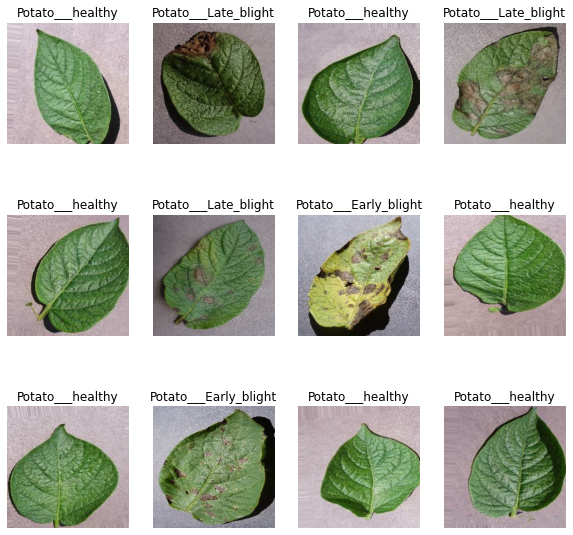

In [18]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [19]:
len(train)

29

**Cache, Shuffle, and Prefetch the Dataset**

In [20]:
train = train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid = valid.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Building the Model


**Creating a Layer for Resizing and Normalization**

In [21]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

**Data Augmentation**

In [22]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

**Applying Data Augmentation to Train Dataset**

In [23]:
train = train.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

# Model Architecture

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

**Compiling the Model**


We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train,
    batch_size=BATCH_SIZE,
    validation_data=valid,
    verbose=1,
    epochs=50,
)

Epoch 1/50
29/29 [==============================] - 22s 351ms/step - loss: 1.0900 - accuracy: 0.3978 - val_loss: 1.0668 - val_accuracy: 0.3333
Epoch 2/50
29/29 [==============================] - 11s 380ms/step - loss: 1.0014 - accuracy: 0.4389 - val_loss: 0.8332 - val_accuracy: 0.4600
Epoch 3/50
29/29 [==============================] - 9s 311ms/step - loss: 0.7355 - accuracy: 0.6478 - val_loss: 0.6875 - val_accuracy: 0.7000
Epoch 4/50
29/29 [==============================] - 9s 312ms/step - loss: 0.5993 - accuracy: 0.7089 - val_loss: 0.6795 - val_accuracy: 0.7267
Epoch 5/50
29/29 [==============================] - 9s 313ms/step - loss: 0.5089 - accuracy: 0.7789 - val_loss: 0.4320 - val_accuracy: 0.7900
Epoch 6/50
29/29 [==============================] - 9s 313ms/step - loss: 0.4087 - accuracy: 0.8200 - val_loss: 0.5333 - val_accuracy: 0.7567
Epoch 7/50
29/29 [==============================] - 9s 312ms/step - loss: 0.4021 - accuracy: 0.8378 - val_loss: 0.5324 - val_accuracy: 0.7367
Epoc

In [28]:
scores = model.evaluate(test)

10/10 [==============================] - 2s 51ms/step - loss: 0.1108 - accuracy: 0.9633


In [29]:
scores

[0.11084907501935959, 0.9633333086967468]

**Plotting the Accuracy and Loss Curves**

In [30]:
history

In [31]:
history.params

{'epochs': 50, 'steps': 29, 'verbose': 1}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
type(history.history['loss'])

list

In [34]:
len(history.history['loss'])

50

In [35]:
history.history['loss'][:5]

[1.0900096893310547,
 1.001433253288269,
 0.7355057597160339,
 0.5992729067802429,
 0.5089107751846313]

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

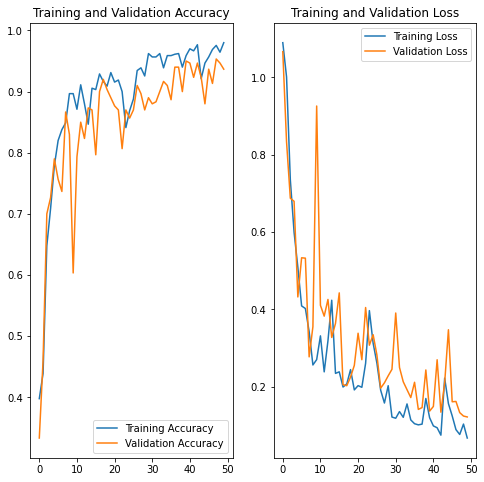

In [37]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Run prediction on a sample image**

first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


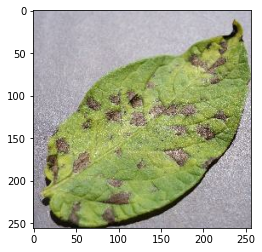

In [38]:
import numpy as np
for images_batch, labels_batch in test.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

**Write a function for inference**

In [39]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

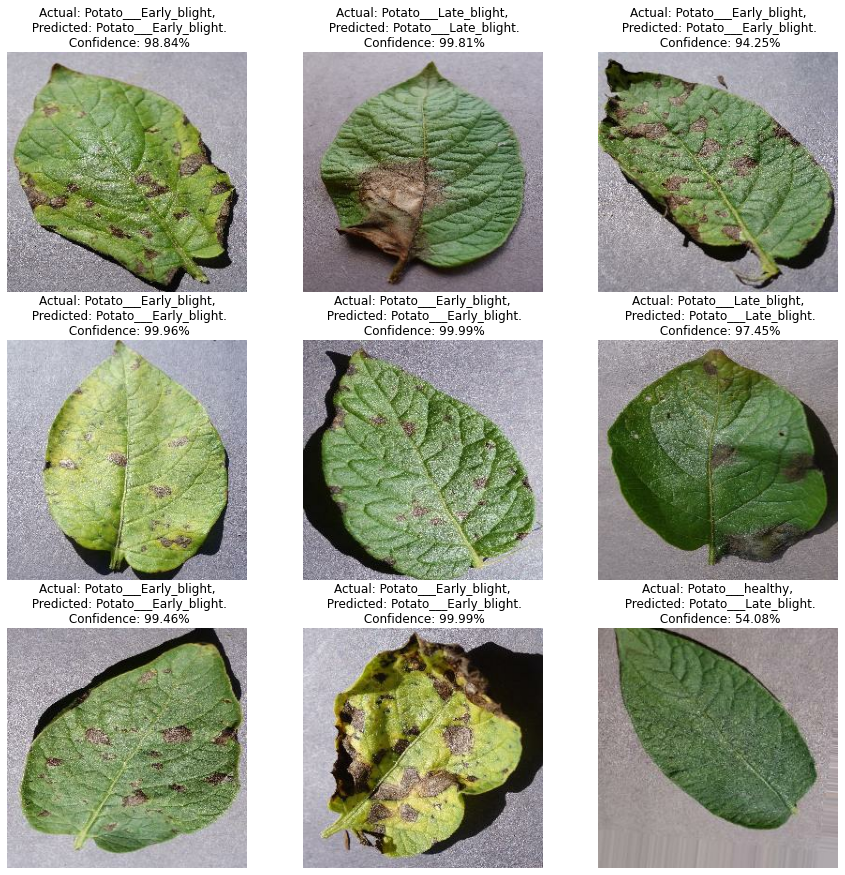

In [41]:
plt.figure(figsize=(15, 15))
for images, labels in test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

**Saving the Model**

In [45]:
model.save("/content/potatoes.h5")